In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Carga de los datos de Iris dataset en CSV
iris_dt = pd.read_csv('Iris.csv')
iris_df = pd.DataFrame(data= np.c_[iris_dt['SepalLengthCm'], iris_dt['SepalWidthCm'], iris_dt['PetalLengthCm'],iris_dt['PetalWidthCm'],iris_dt['Species']], columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'])
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5,3.6,1.4,0.2,Iris-setosa


In [ ]:
#Carga de los datos de Iris dataset desde Scikit-learn
from sklearn import datasets

iris_skl = datasets.load_iris()
#print(iris_skl)
iris_df = pd.DataFrame(data= np.c_[iris_skl['data'], iris_skl['target']], columns = iris_skl['feature_names'] + ['target'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
iris_df.groupby('target').size()

target
0.0    50
1.0    50
2.0    50
dtype: int64

In [ ]:
#Preprocesamiento de conjuntos de entrenamiento y testeo
from sklearn.model_selection import train_test_split

iris_train, iris_test = train_test_split(iris_df, test_size = 0.2, stratify= iris_df['target'],random_state = 10)

In [ ]:
iris_train.groupby('target').size()

target
0.0    40
1.0    40
2.0    40
dtype: int64

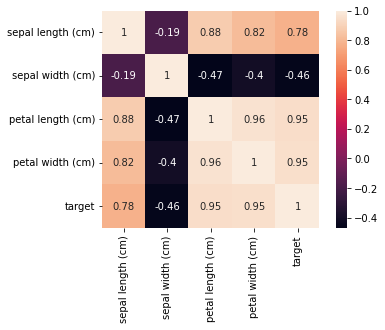

In [ ]:
matriz = iris_train.corr()
sns.heatmap(matriz, annot=True, square=True);
#print(matriz)

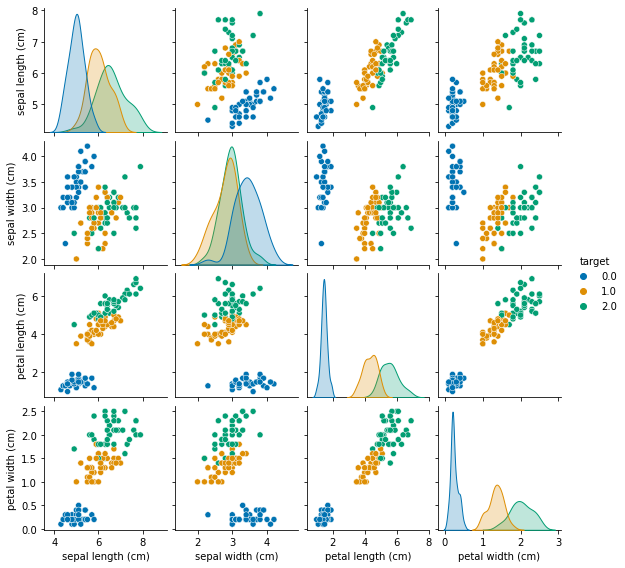

In [ ]:
sns.pairplot(iris_train, hue= 'target', height=2, palette='colorblind');

In [ ]:
#Crear el modelo
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(C = 1e5)

#Entrenamiento
X = np.c_[iris_train['petal length (cm)'], iris_train['petal width (cm)']]
y = iris_train['target']

modelo.fit(X, y)

LogisticRegression(C=100000.0)

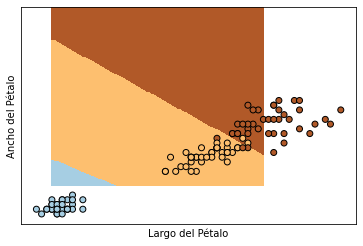

In [ ]:
#Visualización del modelo
x_min, x_max = X[0].min() - .5, X[0].max() + .5
y_min, y_max = X[1].min() - .5, X[1].max() + .5
h = .02

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = modelo.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
#plt.figure(1, figsize = (4,3))
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)

plt.scatter(iris_train['petal length (cm)'], iris_train['petal width (cm)'], c = iris_train['target'], edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Largo del Pétalo')
plt.ylabel('Ancho del Pétalo')

#plt.xlim(xx.min(), xx.max())
#plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

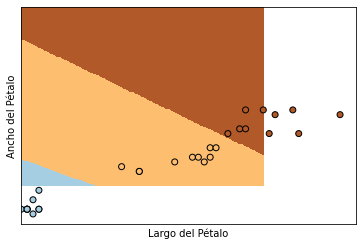

In [ ]:
#Visualización del modelo
x_min, x_max = X[0].min() - .5, X[0].max() + .5
y_min, y_max = X[1].min() - .5, X[1].max() + .5
h = .02

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = modelo.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
#plt.figure(1, figsize = (4,3))
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)

plt.scatter(iris_test['petal length (cm)'], iris_test['petal width (cm)'], c = iris_test['target'], edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Largo del Pétalo')
plt.ylabel('Ancho del Pétalo')

#plt.xlim(xx.min(), xx.max())
#plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

###Probando con otros Modelos de Clasificación


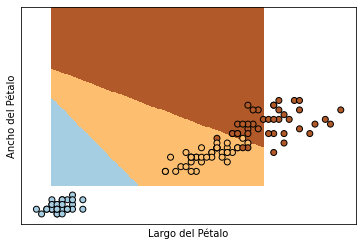

In [ ]:
# Probando con LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

modelo= LinearDiscriminantAnalysis()
modelo.fit(X,y)

#Visualización del modelo
x_min, x_max = X[0].min() - .5, X[0].max() + .5
y_min, y_max = X[1].min() - .5, X[1].max() + .5
h = .02

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = modelo.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
#plt.figure(1, figsize = (4,3))
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)

plt.scatter(iris_train['petal length (cm)'], iris_train['petal width (cm)'], c = iris_train['target'], edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Largo del Pétalo')
plt.ylabel('Ancho del Pétalo')

#plt.xlim(xx.min(), xx.max())
#plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

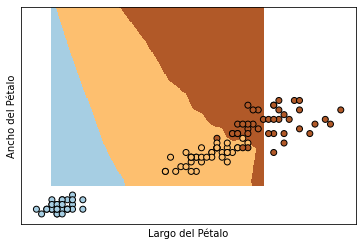

In [ ]:
# Probando con LDA
from sklearn.neighbors import KNeighborsClassifier

modelo= KNeighborsClassifier()
modelo.fit(X,y)

#Visualización del modelo
x_min, x_max = X[0].min() - .5, X[0].max() + .5
y_min, y_max = X[1].min() - .5, X[1].max() + .5
h = .02

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = modelo.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
#plt.figure(1, figsize = (4,3))
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)

plt.scatter(iris_train['petal length (cm)'], iris_train['petal width (cm)'], c = iris_train['target'], edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Largo del Pétalo')
plt.ylabel('Ancho del Pétalo')

#plt.xlim(xx.min(), xx.max())
#plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

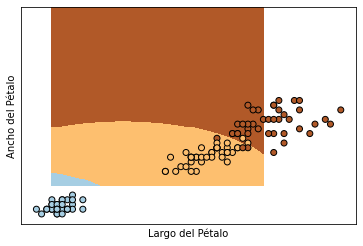

In [ ]:
# Probando con Bayes
from sklearn.naive_bayes import GaussianNB

modelo= GaussianNB()
modelo.fit(X,y)

#Visualización del modelo
x_min, x_max = X[0].min() - .5, X[0].max() + .5
y_min, y_max = X[1].min() - .5, X[1].max() + .5
h = .02

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = modelo.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
#plt.figure(1, figsize = (4,3))
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)

plt.scatter(iris_train['petal length (cm)'], iris_train['petal width (cm)'], c = iris_train['target'], edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Largo del Pétalo')
plt.ylabel('Ancho del Pétalo')

#plt.xlim(xx.min(), xx.max())
#plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

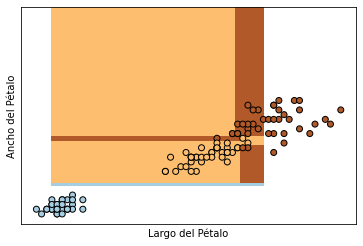

In [ ]:
# Probando con tree
from sklearn.tree import DecisionTreeClassifier

modelo= DecisionTreeClassifier()
modelo.fit(X,y)

#Visualización del modelo
x_min, x_max = X[0].min() - .5, X[0].max() + .5
y_min, y_max = X[1].min() - .5, X[1].max() + .5
h = .02

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = modelo.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
#plt.figure(1, figsize = (4,3))
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)

plt.scatter(iris_train['petal length (cm)'], iris_train['petal width (cm)'], c = iris_train['target'], edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Largo del Pétalo')
plt.ylabel('Ancho del Pétalo')

#plt.xlim(xx.min(), xx.max())
#plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

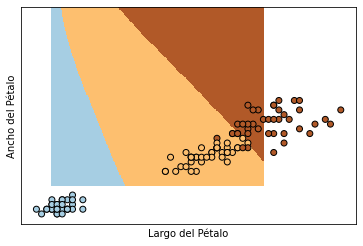

In [ ]:
# Probando con LDA
from sklearn.svm import SVC

modelo= SVC()
modelo.fit(X,y)

#Visualización del modelo
x_min, x_max = X[0].min() - .5, X[0].max() + .5
y_min, y_max = X[1].min() - .5, X[1].max() + .5
h = .02

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = modelo.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
#plt.figure(1, figsize = (4,3))
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)

plt.scatter(iris_train['petal length (cm)'], iris_train['petal width (cm)'], c = iris_train['target'], edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Largo del Pétalo')
plt.ylabel('Ancho del Pétalo')

#plt.xlim(xx.min(), xx.max())
#plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()